# Fourier Transforms

Let $y$ be a periodic function with time period T and fundamental frequency $\omega = \frac{2 \pi}{T}$, then
$$y(t + T) = y(t)$$

Fourier’s theorem
states that any single valued, periodic functions with at most a finite number of
discontinuities can be approximated as the infinite series
$$y(t) \approx \frac{a_0}{2}+ \sum_{n=1}^{\infty} (a_n cos (nωt) + b_n sin (nωt)). $$

Due to orthogonality feature of cos and sin we can obtain $a_n$ and $b_n$ with the formulas
$$a_n = \frac{2}{T} \int_{0}^{T} cos(n \omega t) y(t) dt$$ and,
$$b_n = \frac{2}{T} \int_{0}^{T} sin(n \omega t) y(t) dt$$


The function may not be always periodic. We then use a $\textit{Fourier Integral}$:
$$y(t) = \int_{-\infty}^{+\infty} Y(ω)\frac{e^{iωt}}{\sqrt{ 2 \pi}} dω.$$

Here the Fourier transform $Y (ω)$ is analogous to the Fourier coefficients $(a_n, b_n)$
$$Y(ω) = \int_{-\infty}^{+\infty} y(t)\frac{e^{-iωt}}{\sqrt{ 2 \pi}} dt.$$

In the discrete Fourier transform (DFT) algorithm we assume that the signal y(t)
is measured or computed at only a finite number N of uniform time intervals $∆t = h$,
and for a total time $T = Nh$.

Since our digital computer can process only a finite number of samples, we have to make an approximation and use a limited number of samples. Therefore, generally, a finite-duration sequence is utilized to represent this analog continuous-time signal which may extend to positive infinity on the time axis.

By its very nature, the DFT is an approximation because the signal is not known for
all times and because we will evaluate the integrals approximately. However, the DFT
can be used to reconstruct y(t) for any time. The algorithm evaluates the integral above using the equally-spaced measurements {$y_i$} and the trapezoid integration rule:

$$Y(ω) \approx \int_{0}^{T} y(t)\frac{e^{-iωt}}{\sqrt{ 2 \pi}} dt \approx \sum_{k=1}^N h y(t_k) \frac{e^{-i \omega_n t_k}}{\sqrt{2\pi}} = h \sum_{k=1}^N  y_k \frac{e^{-2\pi i k_n / N}}{\sqrt{2\pi}}$$

Regardless of the true periodicity of the signal, when we sample the signal over a
finite period T, the mathematics produces a y(t) that is periodic with period T, $y(t + T) = y(t)$

We build this periodicity into the algorithm by having a fictitious, measurement YN
at time Nh, that is equals to the first signal measurement: $y_N = y_0$. This does not change the fact that there are just N independent measurements spanning one period.

Here is an example of function which performs DFT

In [10]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

Let's generate a periodic function of which we already know the coefficients

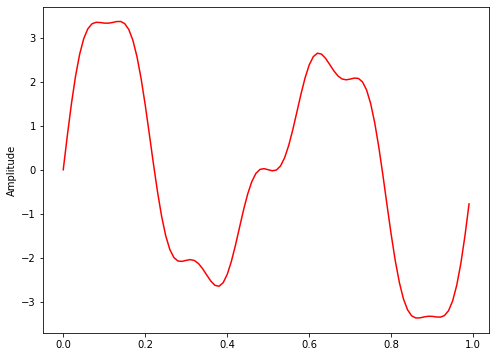

In [11]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 2
x1 = 3*np.sin(2*np.pi*freq*t)

freq = 3
x2 = np.sin(2*np.pi*freq*t)

freq = 7   
x3 = .5* np.sin(2*np.pi*freq*t)

x=x1+x2+x3

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

Now we use the DFT function defined above on this

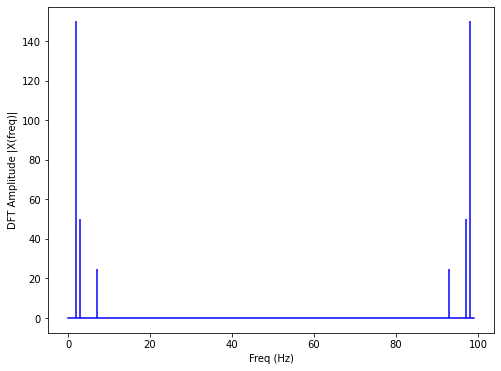

In [12]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

You can see that the frequency domain is symmetric. Nyquist-Shannon sampling theorem states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate. 

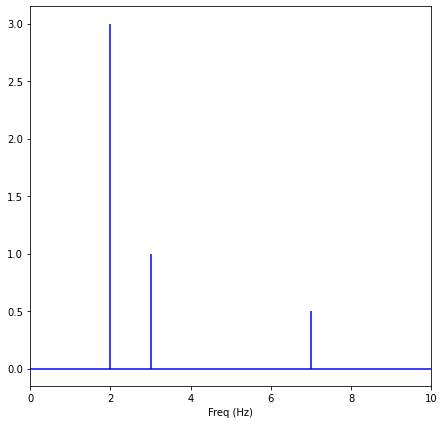

In [14]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))


plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency 2 Hz, 3 Hz, and 7 Hz, with amplitude 3, 1, 0.5 as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.

Now, in python you can also implement DFT using FFT module in numpy

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
power=np.fft.rfft(y)

C:\Users\91884\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


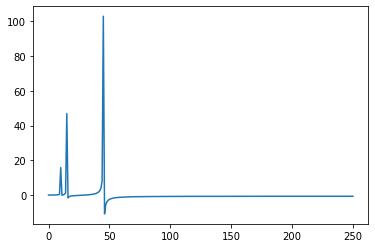

In [20]:
plt.plot(range(len(power)),power)

The power array that we obtained above simply contains the contributions of each frequencies. To visualize the output let us first generate the frequency bins using the np.fft.rfftfreq function. It takes two arguments n and d as the input. n here is the sample length, that is, n-point FFT. d is the sampling space which is the inverse of the sampling rate which is the number of data points that we record per unit time. We generated a sampling rate of 100 in our example above.

In [21]:
#Generate frequency bins.
freq=np.fft.rfftfreq(len(y),0.01) #rfftfreq generates (n/2)+1 frequency bins (the other half are omitted due to the symmetry property)

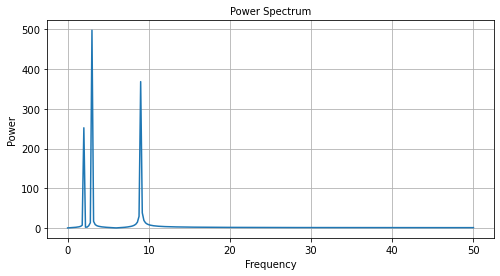

In [22]:
plt.figure(figsize=(8,4))
plt.plot(freq,np.abs(power)) #We simply need relative contribution, so we take the aboslute values of the complex numbers
plt.xlabel("Frequency",size=10)
plt.ylabel("Power",size=10)
plt.title("Power Spectrum",size=10)
plt.grid()
plt.show()

As you can see, we get the required spikes for the corresponding frequencies. 

